In [1]:
# import library
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris


In [2]:
iris = load_iris()
data1 = pd.DataFrame(data = np.c_[iris['data'], iris['target']], columns = iris['feature_names'] + ['target']) 

In [3]:
data1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [4]:
data1.target

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: target, Length: 150, dtype: float64

In [5]:
from sklearn.model_selection import train_test_split


In [6]:
X = data1.iloc[:, 0:4]
print (X)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [7]:
y = data1['target']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 42)

In [9]:
from sklearn import svm
c = 1.0
# SVC with linear kernal
svc = svm.SVC(kernel='linear', C = c).fit(X_train, y_train)


In [10]:
y_pred = svc.predict(X_test)


In [11]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)



array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

In [13]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

1.0


# Multiclass Classification using Support Vector Machine.


In [14]:
# Using method 2 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
import matplotlib.pyplot as plt
import numpy as np


In [15]:
iris = datasets.load_iris()
# store the data in X and y
X = iris.data[:,:2]
y = iris.target

In [16]:
# Split the data in train test mode
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 0)

In this step, we take a look at the different kernel function, the penalty term C is sest to l for all classifier. for the multiclass classification, the type one verus one is specified.

In [18]:
linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train)
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(X_train, y_train)
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train, y_train)

In [19]:
#stepsize in the mesh, it alters the accuracy of the plotprint
#to better understand it, just play with the value, change it and print it
h = .01
#create the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
# create the title that will be shown on the plot
titles = ['Linear kernel','RBF kernel','Polynomial kernel','Sigmoid kernel']

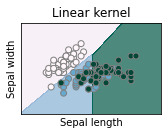

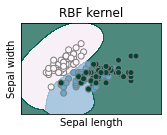

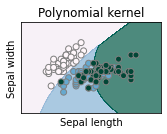

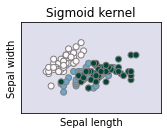

In [20]:
for i, clf in enumerate((linear, rbf, poly, sig)):
    #defines how many plots: 2 rows, 2columns=> leading to 4 plots
    plt.subplot(2, 2, i + 1) #i+1 is the index
    #space between plots
    plt.subplots_adjust(wspace=0.4, hspace=0.4) 
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.PuBuGn, alpha=0.7)
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.PuBuGn,     edgecolors='grey')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    plt.show()

In [21]:
# make prediction on the test data set uding our 4 different
linear_pred = linear.predict(X_test)
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)
sig_pred = sig.predict(X_test)

In [22]:
print(linear_pred,poly_pred,rbf_pred, sig_pred)

[1 1 0 2 0 2 0 2 2 1 1 2 1 2 1 0 1 1 0 0 1 1 0 0 2 0 0 2 1 0] [1 1 0 2 0 2 0 2 2 1 1 2 1 2 1 0 1 1 0 0 1 1 0 0 2 0 0 2 1 0] [1 1 0 2 0 2 0 2 2 2 2 2 2 2 2 0 1 1 0 0 1 1 0 0 2 0 0 2 1 0] [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [24]:
# retrieve the accuracy and print it for all 4 kernel functions
accuracy_lin = linear.score(X_test, y_test)
accuracy_poly = poly.score(X_test, y_test)
accuracy_rbf = rbf.score(X_test, y_test)
accuracy_sig = sig.score(X_test, y_test)
print('“Accuracy Linear Kernel:”', accuracy_lin)
print('“Accuracy Polynomial Kernel:', accuracy_poly)
print('“Accuracy Radial Basis Kernel:”', accuracy_rbf)
print('“Accuracy Sigmoid Kernel:”', accuracy_sig)

“Accuracy Linear Kernel:” 0.7333333333333333
“Accuracy Polynomial Kernel: 0.7333333333333333
“Accuracy Radial Basis Kernel:” 0.6666666666666666
“Accuracy Sigmoid Kernel:” 0.2


At the accuracy reveals, some kernet functions are more useful than others, depending on the data, and abviouslyn more data is also helpful for improving the result (the iris data has a not really big size with 50)

In [25]:
# creating a confusion matrix
cm_lin = confusion_matrix(y_test, linear_pred)
cm_poly = confusion_matrix(y_test, poly_pred)
cm_rbf = confusion_matrix(y_test, rbf_pred)
cm_sig = confusion_matrix(y_test, sig_pred)
print(cm_lin)
print(cm_poly)
print(cm_rbf)
print(cm_sig)

[[11  0  0]
 [ 0  8  5]
 [ 0  3  3]]
[[11  0  0]
 [ 0  8  5]
 [ 0  3  3]]
[[11  0  0]
 [ 0  5  8]
 [ 0  2  4]]
[[ 0  0 11]
 [ 0  0 13]
 [ 0  0  6]]
